1. Which ZIP codes host the most restaurants?
2. How are restaurants distributed geographically?
3. Is there a relationship between geographic position and review ratings?
4. Does description length correlate with menu price?
5. count most common word in description from over all menu?
---
6. How does price range correlate with customer ratings?
7. Do restaurants with few ratings ever display high scores?
8. Which restaurants have the highest scores overall?
9. What is the average menu price by price category?
10. Do menu prices vary more within cheap or expensive restaurants?
---
11. Top restaurants by average position
12.  Correlation between position and score (use original csv here since 'score' was dropped)
13. Menu variety by restaurant
14. Is there a relationship between  score and reating count with item count?
15. category distribution with price






In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_restaurants = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')
df_restaurants_menus = pd.read_csv('data/processed/processed_menus.csv')
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60053 entries, 0 to 60052
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             60053 non-null  int64  
 1   position       60053 non-null  int64  
 2   name           60053 non-null  object 
 3   score          33569 non-null  float64
 4   ratings        33569 non-null  float64
 5   category       60035 non-null  object 
 6   price_range    60053 non-null  int64  
 7   full_address   60053 non-null  object 
 8   zip_code       60053 non-null  object 
 9   lat            60053 non-null  float64
 10  lng            60053 non-null  float64
 11  restaurant_id  60053 non-null  float64
 12  avg_price      60053 non-null  float64
 13  price_sum      60053 non-null  float64
 14  price_min      60053 non-null  float64
 15  price_max      60053 non-null  float64
 16  desc_avg_len   60053 non-null  float64
dtypes: float64(10), int64(3), object(4)
memory usage: 

## Which ZIP codes host the most restaurants?

In [63]:
print('there are ', df_restaurants['zip_code'].unique().size, ' unique zip code')
most_used_zip_cods = df_restaurants['zip_code'].value_counts().head(5).reset_index()
most_used_zip_cods

there are  2413  unique zip code


,zip_code,count
0,75034,318
1,77494,215
2,77004,215
3,77057,205
4,22314,182


Text(0, 0.5, 'count')

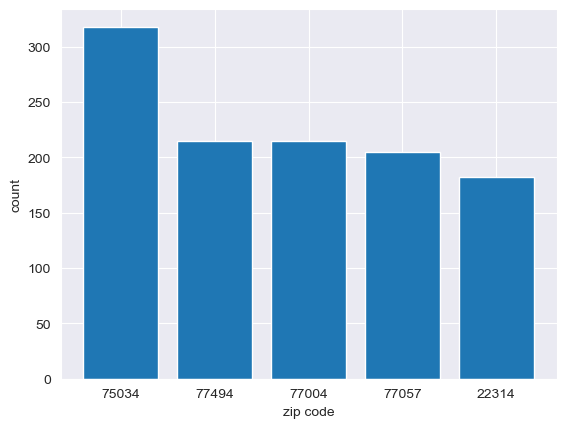

In [64]:
plt.bar(most_used_zip_cods['zip_code'], most_used_zip_cods['count'])
plt.xlabel('zip code')
plt.ylabel('count')

## How are restaurants distributed geographically?
using `Latitude` and `Longitude` we can calculate and And distribute the position on a map

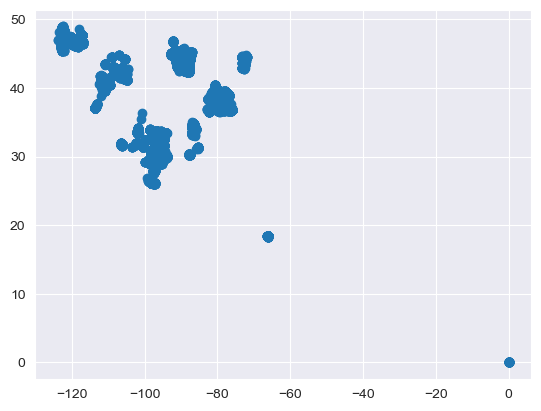

In [65]:
plt.scatter(df_restaurants['lng'], df_restaurants['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## To make the visualization more clear we can cut the same part from the map

In [66]:
print('max Longitude', df_restaurants['lng'].max())
print('min Longitude', df_restaurants['lng'].min())
print('max Latitude', df_restaurants['lat'].max())
print('min Latitude', df_restaurants['lat'].min())


max Longitude 0.0
min Longitude -123.84124
max Latitude 48.96395
min Latitude 0.0


# Is there a relationship between geographic position and review ratings?

To answer this question, we first need to categorize the data based on latitude and longitude.

Here are the updated geographic categories:

| Category Number | Latitude Range | Longitude Range  | Description                     |
|-----------------|----------------|------------------|---------------------------------|
| 1               | 45 to 50       | -150 to -110     | Far Northwest                   |
| 2               | 35 to 45       | -120 to -100     | Western to Central US           |
| 3               | 25 to 38       | -110 to -90      | Southern Central                |
| 4               | 28 to 38       | -90 to -80       | Lower Eastern US                |
| 5               | 35 to 45       | -90 to -70       | Central to Eastern              |
| 6               | 40 to 50       | -100 to -80      | Midwest                         |
| 7               | 40 to 47       | -80 to -60       | Northeast                       |
| 8               | Anything else  | Outside America  | Out of defined region           |

### categorys on image
![Restaurant-category-distribution](img/Restaurant-category-distribution.png)

Text(0, 0.5, 'count')

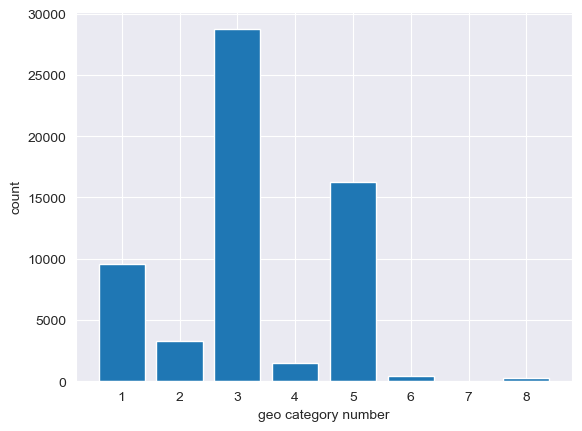

In [68]:
def get_category(lat, lng):
    if 45 <= lat <= 50 and -150 <= lng <= -110:
        return 1
    elif 35 <= lat <= 45 and -120 <= lng <= -100:
        return 2
    elif 25 <= lat <= 38 and -110 <= lng <= -90:
        return 3
    elif 28 <= lat <= 38 and -90 <= lng <= -80:
        return 4
    elif 35 <= lat <= 45 and -90 <= lng <= -70:
        return 5
    elif 40 <= lat <= 50 and -100 <= lng <= -80:
        return 6
    elif 40 <= lat <= 47 and -80 <= lng <= -60:
        return 7
    else:
        return 8  # Anything else, outside defined range


df_restaurants['geo_category'] = df_restaurants.apply(lambda row: get_category(row['lat'], row['lng']), axis=1)

category_counts = df_restaurants['geo_category'].value_counts().reset_index()

plt.bar(category_counts['geo_category'], category_counts['count'])
plt.xlabel('geo category number')
plt.ylabel('count')

In [69]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60053 entries, 0 to 60052
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             60053 non-null  int64  
 1   position       60053 non-null  int64  
 2   name           60053 non-null  object 
 3   score          33569 non-null  float64
 4   ratings        33569 non-null  float64
 5   category       60035 non-null  object 
 6   price_range    60053 non-null  int64  
 7   full_address   60053 non-null  object 
 8   zip_code       60053 non-null  object 
 9   lat            60053 non-null  float64
 10  lng            60053 non-null  float64
 11  restaurant_id  60053 non-null  float64
 12  avg_price      60053 non-null  float64
 13  price_sum      60053 non-null  float64
 14  price_min      60053 non-null  float64
 15  price_max      60053 non-null  float64
 16  desc_avg_len   60053 non-null  float64
 17  geo_category   60053 non-null  int64  
dtypes: flo

### category `3` is the most frequent category

# Now we are ready to start answring on the question
## `Is there a relationship between geographic position and review ratings?`

In [70]:
# print(df_restaurants.isnull().sum())
# print(df_restaurants_droped_null.isnull().sum())
df_restaurants_droped_null = df_restaurants.dropna(subset=['score', 'ratings'])

print(df_restaurants_droped_null['score'].corr(df_restaurants_droped_null['ratings']))
geo_cat_per_score_mean = df_restaurants_droped_null.groupby('geo_category')[['ratings', 'score']].mean().reset_index()
geo_cat_per_score_mean.columns = ['geo_category', 'ratings_count_mean', 'score_mean']
geo_cat_per_score_mean

0.18196453714817012


,geo_category,ratings_count_mean,score_mean
0,1,76.494982,4.596989
1,2,42.887873,4.505180
2,3,75.877498,4.530349
3,4,45.553064,4.494619
4,5,81.226698,4.564666
5,6,39.633333,4.470833
6,8,171.250000,4.680000


Text(0, 0.5, 'Average  ratings count')

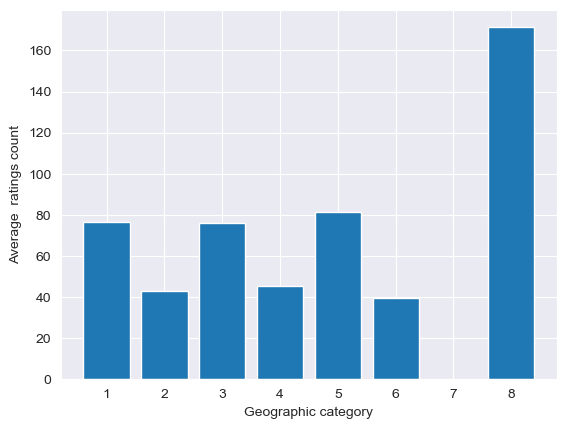

In [71]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['ratings_count_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  ratings count')

### it seems like the Geographic categtory that has the most rating count is `8` and `5`

Text(0, 0.5, 'Average  score')

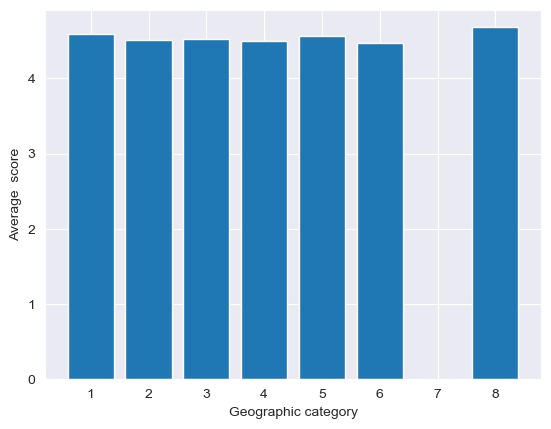

In [72]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['score_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  score')

### the most geogrphic place that has score is `8` and `1`

# Does description length correlate with menu price?

In [74]:
removed_zero_desc = df_restaurants[df_restaurants['desc_avg_len'] != 0.0]
removed_zero_desc['avg_price'].corr(removed_zero_desc['desc_avg_len'])


0.13740314831075764

### there are week postive coraltion between description length and price

## count most common word in description from over all menu

<BarContainer object of 5 artists>

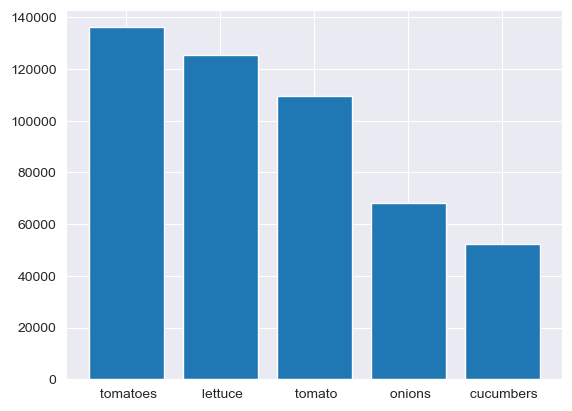

In [75]:
non_null_descriptions = df_restaurants_menus['description'].dropna()

all_words = non_null_descriptions.str.split(',', expand=True).stack()
word_counts = all_words.str.lower().value_counts()
most_common_words = word_counts.head(5)
plt.bar(most_common_words.index, most_common_words.values)


## 🧠 Insights احم احم
### How does price range correlate with customer ratings?

### Do restaurants with few ratings ever display high scores?

### Which restaurants have the highest scores overall?

### What is the average menu price by price category?

### Do menu prices vary more within cheap or expensive restaurants?


### Start with Price range correlation with Customer ratings

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')

# Remove NaN from score 3shan n7sb sa7
df_valid = df[df['score'].notna()].copy()



## Visualize Scores by Price Range with Boxplot

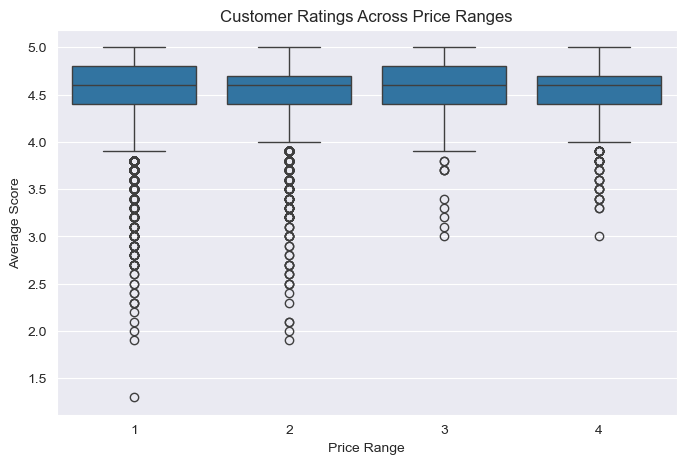

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='price_range', y='score', order=['1', '2', '3', '4'])
plt.title('Customer Ratings Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Score')
plt.show()

# Describe scores per group

In [78]:
df_valid.groupby('price_range')['score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,25449.0,4.56,0.30,1.3,4.4,4.6,4.8,5.0
2,6927.0,4.51,0.32,1.9,4.4,4.6,4.7,5.0
3,187.0,4.55,0.35,3.0,4.4,4.6,4.8,5.0
4,1006.0,4.55,0.29,3.0,4.4,4.6,4.7,5.0


# CORELLATION ANALYSIS

In [79]:
correlation = df_valid[['price_range', 'score']].corr().iloc[0, 1]
print(f"Correlation between price level and average score: {correlation:.3f}")

if correlation > -0.05 and correlation < 0.05:
    print("No or very weak correlation between price level and average score.")
elif correlation > 0.05:
    print("Positive correlation between price level and average score.")


Correlation between price level and average score: -0.037
No or very weak correlation between price level and average score.


# -----------------------

## Do restaurants with few ratings ever display high average scores?

### We want to detect potential bias where restaurants with low count of ratings has high scores
###    for reasons like family/friends members rating the restaurants with bias

### First we Filter out the restaurants with few ratings but high scores
###     lets say <20 ratings is low with a score of > 4.5 is reason to believe there is bias

In [80]:
df_few_high = df_valid[  ## few عشان few count ratings و high عشان high score
    (df_valid['ratings'] <= 25) &
    (df_valid['score'] >= 4.5)
    ]


## Show the sample

In [81]:
df_few_high[['name', 'score', 'ratings', 'price_range']].sort_values(by='score', ascending=False)


,name,score,ratings,price_range
45306,Feng Cha Tea House Carrollton,5.0,22.0,1
14208,Pacific Indian Cuisine,5.0,12.0,1
53529,McDonald's® (2550 E LEAGUE CITY PARKWAY),5.0,11.0,1
14312,Tea King,5.0,20.0,1
27095,KogiBBQ Street Kitchen,5.0,16.0,1
...,...,...,...,...
44576,Burnt BBQ &amp; Tacos Best Sellers,4.5,10.0,1
16784,Hardee's 2982 (5001 Victory Blvd.),4.5,16.0,1
44562,TLC Vegan Kitchen Best Sellers,4.5,11.0,1
16884,KFC (320 W. Reservoir Rd.),4.5,11.0,1


# Plot it

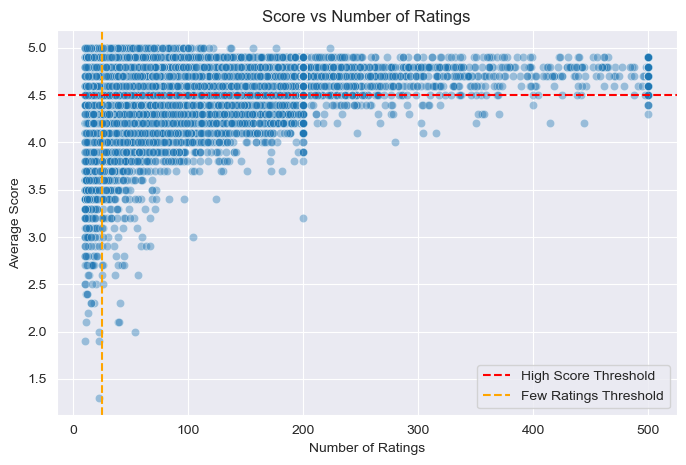

In [82]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_valid, x='ratings', y='score', alpha=0.4)
plt.axhline(4.5, color='red', linestyle='--', label='High Score Threshold')
plt.axvline(25, color='orange', linestyle='--', label='Few Ratings Threshold')
plt.title('Score vs Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Score')
plt.legend()
plt.show()

### We found that 5454 restaurants had a score ≥ 4.5 but only 20 or fewer ratings.

### This suggests some bias but might not be reliable due to a small sample size.


### Save our findings in a csv file

In [83]:
df_few_high.to_csv('data/processed/few_ratings_high_score.csv', index=False)


# Which restaurants have the highest scores overall?

### first we sort by score and ratings to get overall highest rated restaurant

In [84]:
df_top_sorted = df_valid.sort_values(by=['score', 'ratings'],
                                     ascending=[False, False])


### Now we Show the top 10 of data

In [85]:
df_top_sorted[['name', 'score', 'ratings', 'price_range']].head(10)


,name,score,ratings,price_range
17579,Starbucks (S. Van Dorn and Pickett),5.0,223.0,1
27184,Sundevich,5.0,176.0,1
22030,Berries &amp; Bowls,5.0,156.0,1
21813,Starbucks (South Riding Blvd),5.0,137.0,1
18997,Open Road (ROSSLYN),5.0,136.0,1
41751,Delightful Donut,5.0,121.0,1
45062,Smoothie King (5000 Belt Line Road),5.0,118.0,1
33661,Cafe Vida (Rogers Ranch),5.0,114.0,1
59647,Purify Bowls &amp; Smoothies,5.0,113.0,1
11456,Banh Mi Up,5.0,112.0,1


## Plot for top 10

C:\Users\mosta\AppData\Local\Temp\ipykernel_14132\1651431268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')


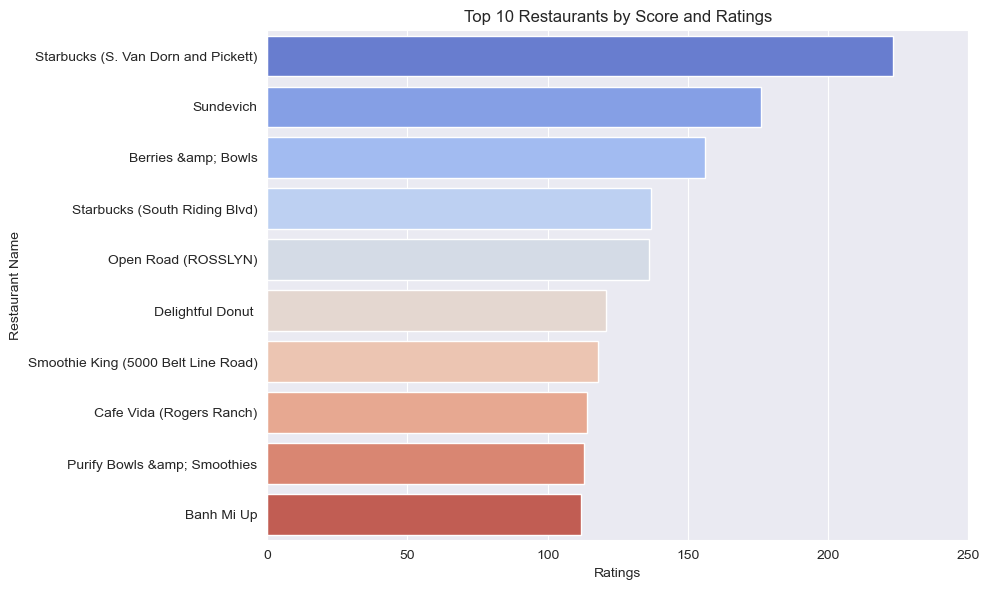

In [86]:
top_10 = df_top_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')
plt.title('Top 10 Restaurants by Score and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Restaurant Name')
plt.xlim(0, 250)
plt.tight_layout()
plt.show()


# -------------------------------------------------------------

# Do menu prices vary more within cheaper or more expensive restaurants?

## Create a column for price range spread to see the price differenece for each restaurant

In [87]:
df_restaurants['price_spread'] = df_restaurants['price_max'] - df_restaurants['price_min']


 ## Group by price_range and check average spread and plot

In [88]:
df_restaurants.groupby('price_range')['price_spread'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,44059.0,26.78,31.39,0.0,11.90,17.0,28.79,1048.71
2,14002.0,28.67,31.61,0.0,11.25,18.0,35.50,448.50
3,338.0,38.51,22.11,0.0,26.96,35.0,45.01,191.00
4,1654.0,64.70,37.16,26.0,41.00,53.3,74.28,373.71


# ?????? ايه الهبل ده

## remove extreme outliers

In [89]:
Q1 = df_restaurants['price_spread'].quantile(0.25)
Q3 = df_restaurants['price_spread'].quantile(0.75)
IQR = Q3 - Q1

lower = max(0, Q1 - 1.5 * IQR)
upper = Q3 + 1.5 * IQR

df_spread_clean = df_restaurants[
    (df_restaurants['price_spread'] >= lower) &
    (df_restaurants['price_spread'] <= upper)
    ]


## try again

In [90]:
df_spread_clean.groupby('price_range')['price_spread'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,40827.0,20.01,13.06,0.0,11.34,16.30,25.19,64.57
2,12710.0,20.86,14.24,0.0,10.50,16.20,29.00,64.54
3,312.0,33.90,13.23,0.0,26.00,34.00,43.00,64.50
4,1096.0,45.68,9.05,26.0,37.94,44.05,53.00,64.50


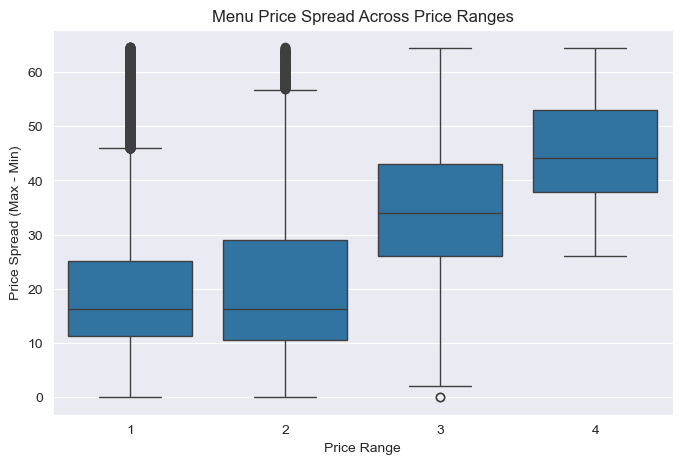

In [91]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spread_clean, x='price_range', y='price_spread')
plt.title('Menu Price Spread Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Price Spread (Max - Min)')
plt.show()

## As we can see the mean spread increases by order of category ...   يعني في higher price difference in higher categories

# ---------------------------------------------

# What is the average menu price by price category?


### Group by price_range

In [92]:
df_restaurants.groupby('price_range')['avg_price'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,44059.0,8.87,3.69,0.02,6.06,8.44,11.31,20.61
2,14002.0,9.78,3.82,0.31,7.17,9.62,12.00,20.60
3,338.0,14.22,3.68,2.81,12.07,14.29,16.92,20.53
4,1654.0,12.67,3.37,1.35,10.39,12.46,14.93,20.61


### Insight: Average Menu Price by Restaurant Tier

### - Tier 1 (cheap): $8.87  
### - Tier 2 (moderate): $9.78  
### - Tier 3 (expensive): $14.22  
### - Tier 4 (luxury): $12.67


## SAIF

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data

In [94]:
restaurants_df = pd.read_csv("data/processed/processed_restaurants_no_outliers.csv")
menu_df = pd.read_csv("data/raw/restaurant-menus.csv")

# ============================
# 🔍 Search Ranking Insights
# ============================

# 1. Top restaurants by average position

🔝 Top 10 Restaurants by Average Search Position:
                                                    name  position
4804                                       Hitching Post         1
24551                          7-Eleven (961 Temple Ave)         1
24565                       McDonald's® (1101 BOULEVARD)         1
44678                 Corner Bakery (3301 Preston Rd #2)         1
44578                 Burnt BBQ &amp; Tacos Best Sellers         1
24573                                CVS (629 BOULEVARD)         1
44479                               Zac's Afghan Kitchen         1
44853                                    Hungry Platters         1
44470                     7-Eleven (3636 Ranch Rd 620 N)         1
44428                           Denny's (1201 Hwy 146 N)         1
44425                    The Burger Den (1201 Hwy 146 N)         1
24604                               Kanak Indian Kitchen         1
6866   CVS (3764 TEAYS VALLEY ROAD, CORNER OF HOSPITA...         1
6861         

<BarContainer object of 20 artists>

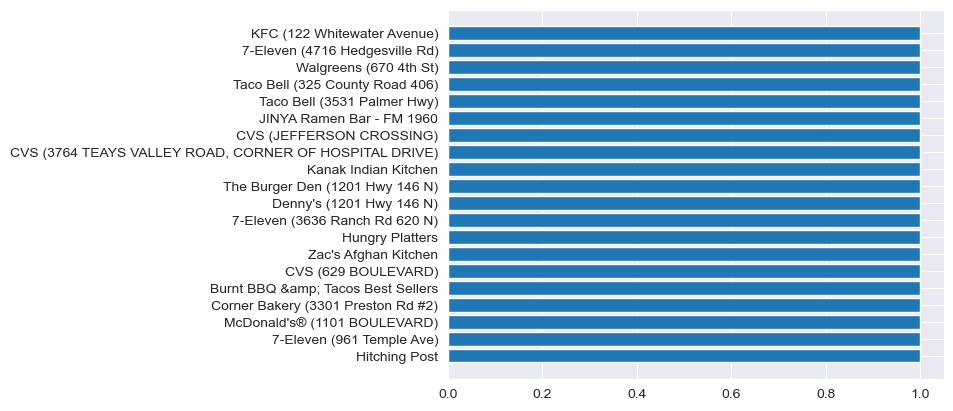

In [95]:
top_ranked = restaurants_df[['name', 'position']].sort_values(by='position').head(20)
print("🔝 Top 10 Restaurants by Average Search Position:")
print(top_ranked)
plt.barh(top_ranked['name'], top_ranked['position'])


# 2. Correlation between position and score (use original csv here since 'score' was dropped)

In [96]:
clean_df = restaurants_df.dropna(subset=['position', 'score', 'ratings'])

correlation1 = clean_df['position'].corr(clean_df['score'])
correlation2 = clean_df['position'].corr(clean_df['ratings'])
print("📈 Correlation between position and score:", correlation1)
print("📈 Correlation between position and ratings count:", correlation2)


📈 Correlation between position and score: 0.07658187574770735
📈 Correlation between position and ratings count: -0.003387595542378647


### there are no Correlation between score and postion
### there are no Correlation between ratings count and postion


# ============================
# 🥘 Menu Diversity Insights
# ============================
# 1. Menu variety by restaurant

<BarContainer object of 10 artists>

C:\Users\mosta\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\mosta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


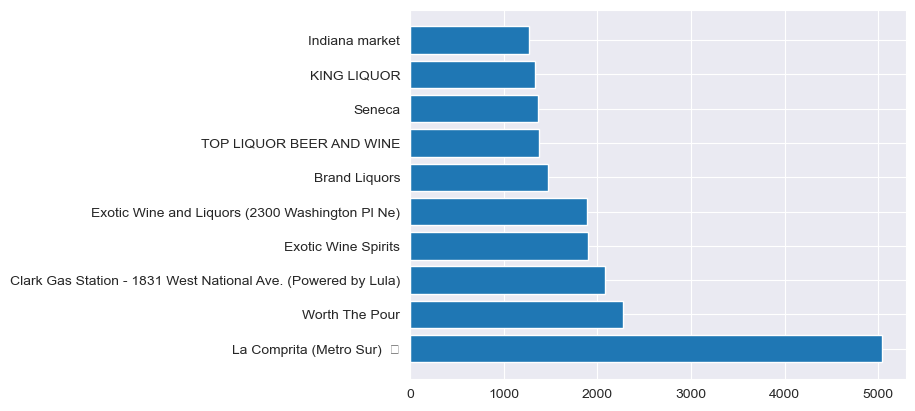

In [97]:
orig_restaurants = pd.read_csv("data/raw/restaurants.csv")
menu_counts = menu_df.groupby('restaurant_id')['name'].nunique().reset_index()
menu_counts.columns = ['id', 'menu_item_count']

top_menus = menu_counts.sort_values(by='menu_item_count', ascending=False).head(10).reset_index()
top_menus = top_menus.merge(orig_restaurants[['id', 'name']], on='id')

plt.barh(top_menus['name'], top_menus['menu_item_count'])

##  Is there a relationship between search ranking and review score with item count?

📊 Correlation between menu item count and total reviews: 0.12294434906059372
📊 Correlation between menu item count and total score: 0.05329488708825083


<BarContainer object of 2 artists>

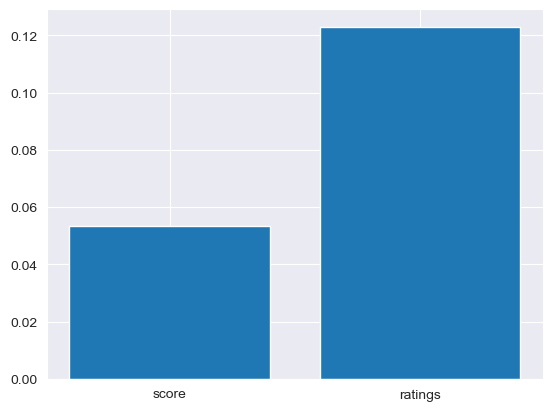

In [98]:
ratings = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')
ratings.dropna(subset=['score', 'ratings', 'id'], inplace=True)
merged_df = pd.merge(menu_counts, ratings, on='id')

correlation2 = merged_df['menu_item_count'].corr(merged_df['ratings'])
correlation3 = merged_df['menu_item_count'].corr(merged_df['score'])
print("📊 Correlation between menu item count and total reviews:", correlation2)
print("📊 Correlation between menu item count and total score:", correlation3)
plt.bar(['score', 'ratings'], [correlation3, correlation2])

#### there a small positive  Correlation between number of items and rating count

#### there no Correlation between item count and score

## category distribution with mean price

<BarContainer object of 10 artists>

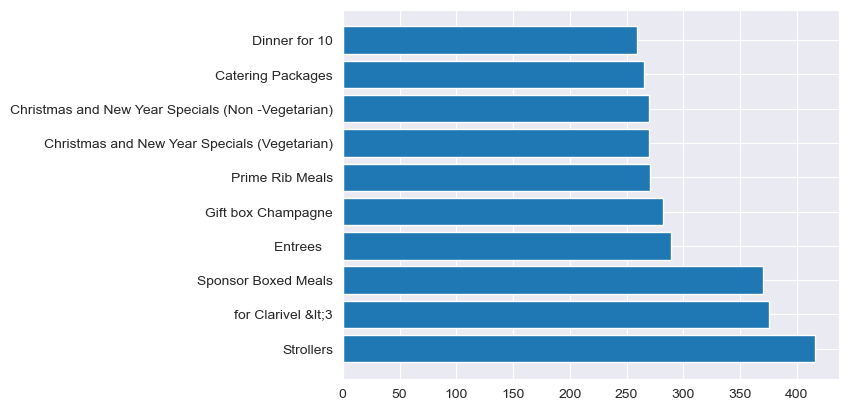

In [2]:
df = df_restaurants_menus.dropna(subset=['category', 'price'])
category_per_price = df_restaurants_menus.groupby('category')['price'].mean().sort_values(
    ascending=False).reset_index().head(10)

plt.barh(category_per_price['category'], category_per_price['price'])